# Exploración de datos

## Lectura de datos

In [2]:
import pandas as pd
import nltk
import gensim

df = pd.read_csv("./dataset/final.csv")

## Exploración de datos

Encabezado de los primeros 5 registros del archivo `True.csv`

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,title,text,subject,date,isfake,original,lemma,clean,clean_joined
0,0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t...","['as', 'U.S.', 'budget', 'fight', 'loom', ',',...","['budget', 'fight', 'loom', 'republicans', 'fl...",budget fight loom republicans flip fiscal scri...
1,1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...,"['U.S.', 'military', 'to', 'accept', 'transgen...","['military', 'accept', 'transgender', 'recruit...",military accept transgender recruit monday pen...
2,2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...,"['senior', 'U.S.', 'republican', 'senator', ':...","['senior', 'republican', 'senator', 'mueller',...",senior republican senator mueller washington r...
3,3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...,"['FBI', 'Russia', 'probe', 'help', 'by', 'Aust...","['russia', 'probe', 'help', 'australian', 'dip...",russia probe help australian diplomat washingt...
4,4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...,"['Trump', 'want', 'postal', 'Service', 'to', '...","['trump', 'want', 'postal', 'service', 'charge...",trump want postal service charge amazon shipme...


#### Información general del archivo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    44898 non-null  int64 
 1   Unnamed: 0.1  44898 non-null  int64 
 2   title         44898 non-null  object
 3   text          44898 non-null  object
 4   subject       44898 non-null  object
 5   date          44898 non-null  object
 6   isfake        44898 non-null  int64 
 7   original      44898 non-null  object
 8   lemma         44898 non-null  object
 9   clean         44898 non-null  object
 10  clean_joined  44898 non-null  object
dtypes: int64(3), object(8)
memory usage: 3.8+ MB


#### Registros nulos en el archivo

In [5]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
title           0
text            0
subject         0
date            0
isfake          0
original        0
lemma           0
clean           0
clean_joined    0
dtype: int64

#### Combinación de título y texto

In [6]:
df['original'].head()

0    As U.S. budget fight looms, Republicans flip t...
1    U.S. military to accept transgender recruits o...
2    Senior U.S. Republican senator: 'Let Mr. Muell...
3    FBI Russia probe helped by Australian diplomat...
4    Trump wants Postal Service to charge 'much mor...
Name: original, dtype: object

#### Muestra de la combinación anterior

In [14]:
df['title'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script'

In [15]:
df['text'][0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [16]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script. WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for no

#### Total de palabras en el Dataset

In [7]:
list_of_words = []
unique_words = set()
for document in df.clean:
    for word in document:
        list_of_words.append(word)
        unique_words.add(word)
        
total_words = len(list_of_words)  # total words
unique_words = len(unique_words)   # total unique words
print("Total words:" + str(total_words) + " unique_words:" + str(unique_words))

Total words:93491738 unique_words:48


### Palabras unidas después de procesamiento (Lemmatización y elimincación de Stopwords)

In [8]:
df['clean_joined'].head()

0    budget fight loom republicans flip fiscal scri...
1    military accept transgender recruit monday pen...
2    senior republican senator mueller washington r...
3    russia probe help australian diplomat washingt...
4    trump want postal service charge amazon shipme...
Name: clean_joined, dtype: object

#### Ejemplo de texto limpio

In [27]:
df['clean_joined'][0]

'budget fight loom republicans flip fiscal script washington reuters head conservative republican faction congress vote month huge expansion national debt fiscal conservative sunday urge budget restraint sharp pivot republicans representative mark meadows speak face nation draw hard line federal spending lawmaker brace battle january return holiday wednesday lawmaker begin pass federal budget fight likely link issue immigration policy november congressional election campaign approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increase defense discretionary spend program support education scientific research infrastructure public health environmental protection trump administration willing increase defense discretionary spending percent meadows chairman small influential house freedom caucus program democrats need government raise percent fiscal conservative rationale eventually people money mea

----

# Visualización de los datos

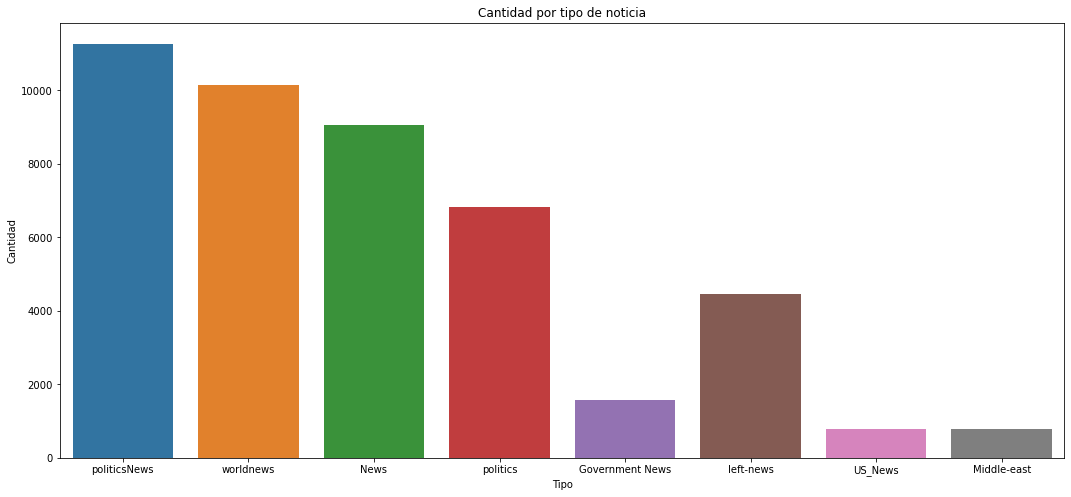

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18, 8))
sns.countplot(data = df, x="subject")
plt.title('Cantidad por tipo de noticia')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

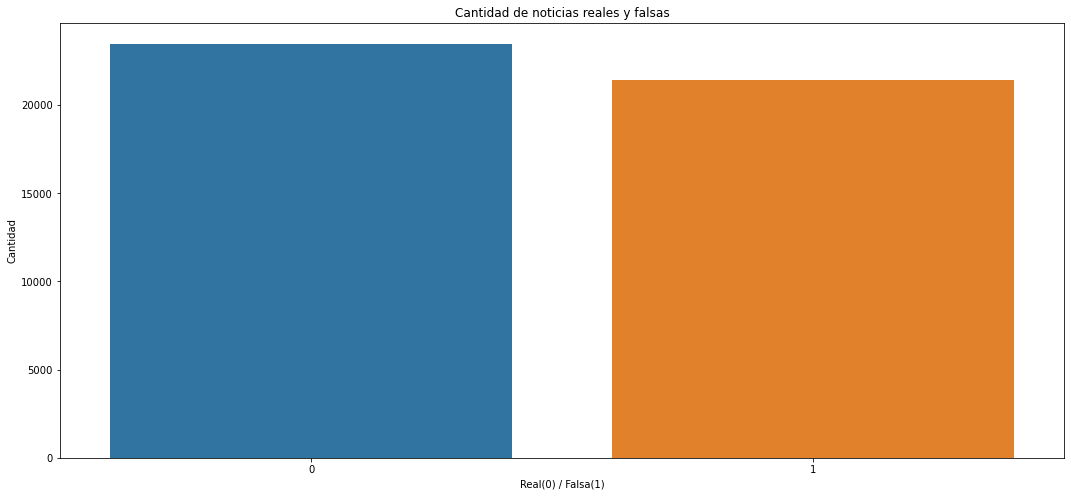

In [10]:
plt.figure(figsize = (18, 8))
sns.countplot(data = df, x="isfake")
plt.title('Cantidad de noticias reales y falsas')
plt.xlabel('Real(0) / Falsa(1)')
plt.ylabel('Cantidad')
plt.show()

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words.extend(list(gensim.parsing.preprocessing.STOPWORDS))
stop_words = list(set(stop_words))

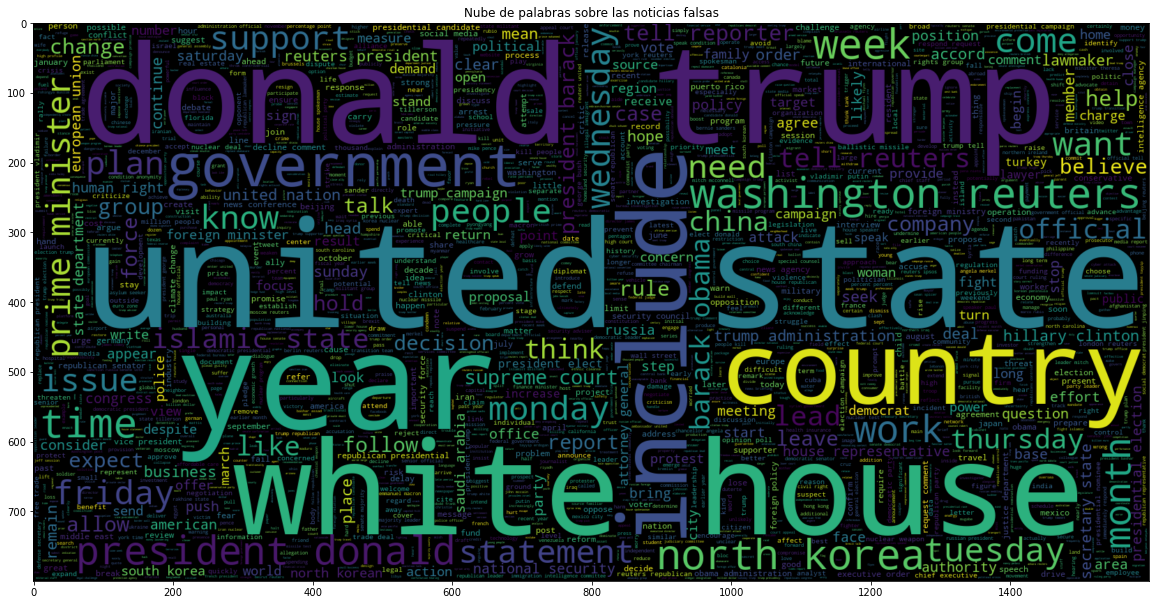

In [14]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Nube de palabras sobre las noticias falsas')
plt.show()

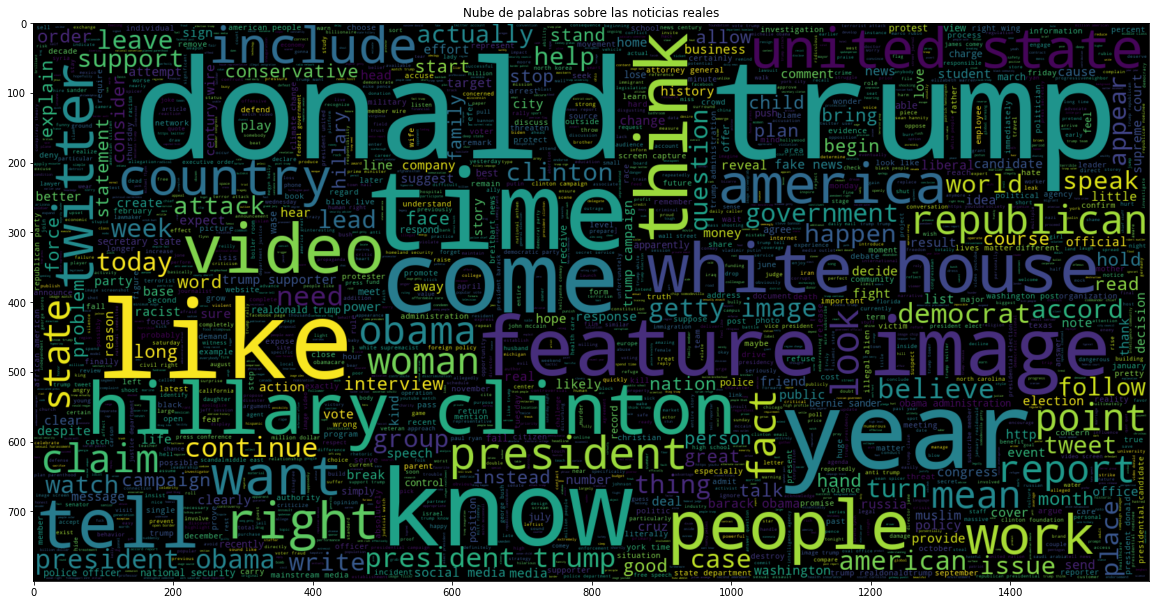

In [15]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Nube de palabras sobre las noticias reales')
plt.show()